In [1]:
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from napari import Viewer
from pathlib import Path
import numpy as np

In [2]:
# You might need to modify the path according to where you saved your dataset
# Note that the `Path` library will deal with OS dependant path issues
path = Path('../data/placozoan-movie.tif')
im = imread(path)
nb_time_points = im.shape[0]

In [37]:
viewer = Viewer()

/home/clement/Documents/centuri-hackaton/venv/lib/python3.8/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [17]:
viewer.add_image(labels)

<Image layer 'labels' at 0x7f6a5192a940>

In [4]:
path_label = Path('../data/labeled_WOUND.tiff')
labels = imread(path_label)
nb_time_points = im.shape[0]

In [20]:
np.unique(labels[0])

array([0, 1], dtype=int64)

In [36]:
for i, t in enumerate(labels):
    imwrite("../data/all/"+str(i)+".tiff", im[i])

In [5]:
for i, t in enumerate(labels):
    if 1 in np.unique(t):
        t[t!=1]=2
        print(np.unique(t))
        imwrite("../data/input2/"+str(i)+".tiff", im[i])
        imwrite("../data/target2/"+str(i)+".tiff", t)

[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]
[1 2]


In [32]:
t

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

In [30]:
t[t==0] = 2
t

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

In [6]:
viewer.layers

NameError: name 'viewer' is not defined

In [10]:
viewer = Viewer()

RecursionError: maximum recursion depth exceeded

In [3]:
viewer.add_image(im[0])

NameError: name 'im' is not defined

In [51]:
img = im[0]

In [22]:
data.shape

(576, 576)

In [38]:
np.max(img)

221

In [44]:
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)

In [47]:
image = skimage.img_as_float(img)
gradient = inverse_gaussian_gradient(image)

im_test3 = morphological_geodesic_active_contour(gradient, num_iter=100,
                                                 smoothing=1, balloon=-1,
                                                 threshold=0.69)

In [49]:
viewer.add_image(gradient)

<Image layer 'gradient' at 0x7f2035de36d0>

In [41]:

data = skimage.img_as_float(img)
data = rescale_intensity(data,in_range=(0, 255),
                         out_range=(-1, 1))


# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = viewer.layers[-1].data


# Run random walker algorithm
labels = random_walker(data, markers, beta=1, mode='bf')

In [42]:
viewer.add_image(labels)

<Image layer 'labels' at 0x7f2035de3bb0>

In [37]:
viewer.add_image(data)

<Image layer 'data' at 0x7f20360f8490>

In [28]:
viewer.add_image(markers)
viewer.add_image(data)

<Image layer 'data [2]' at 0x7f20140afc40>

In [ ]:
import imageio

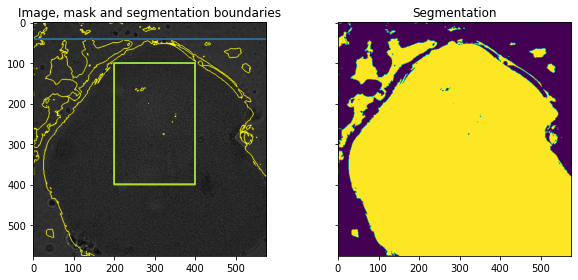

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

img = img

# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
training_labels = np.zeros(img.shape, dtype=np.uint8)
training_labels[:40] = 1
training_labels[100:400, 200:400] = 2

sigma_min = 5
sigma_max = 20
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50,
                             max_depth=15, max_samples=0.1)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

In [98]:
med = skimage.filters.median(img)

In [115]:
im_test1 = watershed(med, markers=500, compactness=0.2)

In [117]:
viewer.add_image(result)

<Image layer 'result' at 0x7f20141da970>

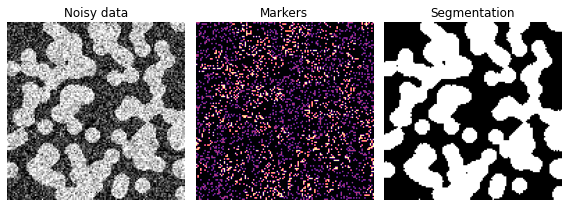

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

rng = np.random.default_rng()

# Generate noisy synthetic data
data = skimage.img_as_float(binary_blobs(length=128, seed=1))
sigma = 0.01
data += rng.normal(loc=0, scale=sigma, size=data.shape)
data = rescale_intensity(data, in_range=(-sigma, 1 + sigma),
                         out_range=(-1, 1))

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.95] = 1
markers[data > 0.95] = 2

# Run random walker algorithm
labels = random_walker(data, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(data, cmap='gray')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()

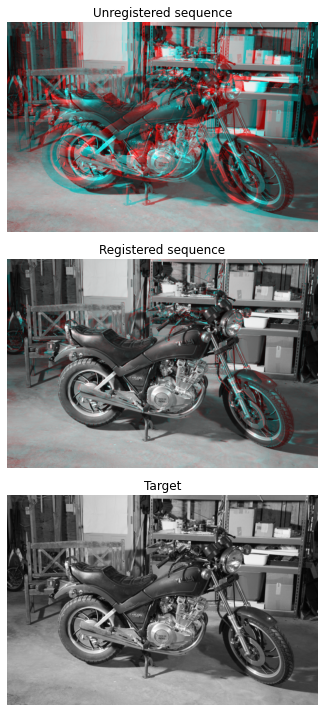

In [118]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk

# --- Load the sequence
image0, image1, disp = stereo_motorcycle()

# --- Convert the images to gray level: color is not supported.
image0 = rgb2gray(image0)
image1 = rgb2gray(image1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0, image1)

# --- Use the estimated optical flow for registration

nr, nc = image0.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),
                                     indexing='ij')

image1_warp = warp(image1, np.array([row_coords + v, col_coords + u]),
                   mode='edge')

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = image1
seq_im[..., 1] = image0
seq_im[..., 2] = image0

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = image0
reg_im[..., 2] = image0

# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = image0
target_im[..., 1] = image0
target_im[..., 2] = image0

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()

In [131]:
np.bitwise_and(u>-0.05,u<0.05)

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [176]:
image0, image1 = im[0], im[3]

# --- Compute the optical flow
v, u = optical_flow_ilk(image0, image1, radius=30)

In [178]:
viewer.add_image(im)

<Image layer 'im' at 0x7f2034e6b730>

In [179]:
!pip install napari-yapic-prediction

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached numpy-1.22.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.9 MB)
Using legacy 'setup.py install' for yapic, since package 'wheel' is not installed.
Using legacy 'setup.py install' for docopt, since package 'wheel' is not installed.
  Running setup.py install for docopt ... done
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.

In [156]:
viewer.add_image(np.abs(v) + np.abs(u))

<Image layer 'Image [3]' at 0x7f203498e9a0>

In [177]:
viewer.add_image(skimage.filters.gaussian(np.abs(v) + np.abs(u), 5)>1)


<Image layer 'Image [1]' at 0x7f1fd959c7f0>

In [145]:
v_ = v.copy()
v_mean = skimage.filters.median(u)
v_[np.bitwise_and(v_mean>-0.1,v_mean<0.1)] = -10
viewer.add_image(v_)
viewer.add_image(v_mean)

<Image layer 'v_mean' at 0x7f2034d5ff10>

In [143]:
viewer.add_image(v)
viewer.add_image(u)

<Image layer 'u' at 0x7f2034c7c9a0>

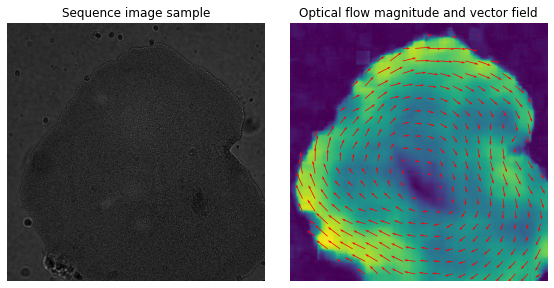

In [141]:
image0, image1 = im[0], im[1]

# --- Compute the optical flow
v, u = optical_flow_ilk(image0, image1, radius=5)

# --- Compute flow magnitude
norm = np.sqrt(u ** 2 + v ** 2)

# --- Display
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# --- Sequence image sample

ax0.imshow(image0, cmap='gray')
ax0.set_title("Sequence image sample")
ax0.set_axis_off()

# --- Quiver plot arguments

nvec = 20  # Number of vectors to be displayed along each image dimension
nl, nc = image0.shape
step = max(nl//nvec, nc//nvec)

y, x = np.mgrid[:nl:step, :nc:step]
u_ = u[::step, ::step]
v_ = v[::step, ::step]

ax1.imshow(norm)
ax1.quiver(x, y, u_, v_, color='r', units='dots',
           angles='xy', scale_units='xy', lw=3)
ax1.set_title("Optical flow magnitude and vector field")
ax1.set_axis_off()
fig.tight_layout()

plt.show()